In [1]:
# import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading all three files

df1 = pd.read_csv('branch_data.csv')
df2 = pd.read_csv('customer_data.csv')
df3 = pd.read_csv('transaction_data.csv')

In [3]:
df1.head()

,branch_id,branch_name,city,region
0,B001,Delhi Branch 1,Delhi,North
1,B002,Bhubaneswar Branch 2,Bhubaneswar,East
2,B003,Bhubaneswar Branch 3,Bhubaneswar,East
3,B004,Hyderabad Branch 4,Hyderabad,South
4,B005,Delhi Branch 5,Delhi,North


In [4]:
df2.head()

,customer_id,branch_id,customer_type,join_date
0,C00001,B021,Retail,2022-11-30
1,C00002,B006,Retail,2021-04-13
2,C00003,B013,Retail,2021-01-21
3,C00004,B006,Retail,2021-08-21
4,C00005,B025,SME,2022-11-13


In [5]:
df3.head()

,transaction_id,customer_id,date,amount,transaction_type
0,T000001,C02966,2023-07-20,16024,Deposit
1,T000002,C00471,2023-12-25,15357,Loan Payment
2,T000003,C00211,2023-09-07,23157,Loan Payment
3,T000004,C01711,2023-07-21,5176,Deposit
4,T000005,C01509,2023-01-14,13071,Loan Payment


In [6]:
# check shape of all three dataframes

print("Branches shape:", df1.shape)
print("Customers shape:", df2.shape)
print("Transactions shape:", df3.shape)

Branches shape: (25, 4)
Customers shape: (3000, 4)
Transactions shape: (80000, 5)


In [7]:
# check datatype and fix (if any issue)

df1.dtypes

branch_id      object
branch_name    object
city           object
region         object
dtype: object

In [8]:
df2.dtypes

customer_id      object
branch_id        object
customer_type    object
join_date        object
dtype: object

In [9]:
df2['join_date'] = pd.to_datetime(df2['join_date'])

df2.dtypes

customer_id              object
branch_id                object
customer_type            object
join_date        datetime64[ns]
dtype: object

In [10]:
df3.dtypes

transaction_id      object
customer_id         object
date                object
amount               int64
transaction_type    object
dtype: object

In [11]:
df3['date'] = pd.to_datetime(df3['date'])

df3.dtypes

transaction_id              object
customer_id                 object
date                datetime64[ns]
amount                       int64
transaction_type            object
dtype: object

In [12]:
# check for duplicates

print("Branches:",df1.duplicated().sum())
print("Customers:",df2.duplicated().sum())
print("Transactions:",df3.duplicated().sum())

Branches: 0
Customers: 0
Transactions: 0


In [13]:
# check for null values

print(df1.isnull().sum())
print(df2.isnull().sum())
print(df3.isnull().sum())

branch_id      0
branch_name    0
city           0
region         0
dtype: int64
customer_id      0
branch_id        0
customer_type    0
join_date        0
dtype: int64
transaction_id      0
customer_id         0
date                0
amount              0
transaction_type    0
dtype: int64


In [14]:
# merge transactions with customers

merged_df = df3.merge(df2,on="customer_id",how="left")

# merge with branches

merged_df = merged_df.merge(df1,on="branch_id",how="left")

merged_df.head()

,transaction_id,customer_id,date,amount,transaction_type,branch_id,customer_type,join_date,branch_name,city,region
0,T000001,C02966,2023-07-20,16024,Deposit,B016,Retail,2022-09-28,Mumbai Branch 16,Mumbai,West
1,T000002,C00471,2023-12-25,15357,Loan Payment,B012,Retail,2023-04-09,Hyderabad Branch 12,Hyderabad,South
2,T000003,C00211,2023-09-07,23157,Loan Payment,B010,SME,2022-11-09,Chennai Branch 10,Chennai,South
3,T000004,C01711,2023-07-21,5176,Deposit,B024,SME,2022-11-16,Mumbai Branch 24,Mumbai,West
4,T000005,C01509,2023-01-14,13071,Loan Payment,B003,Retail,2022-06-23,Bhubaneswar Branch 3,Bhubaneswar,East


In [15]:
# let's understand overall data

merged_df.describe(include='all')

,transaction_id,customer_id,date,amount,transaction_type,branch_id,customer_type,join_date,branch_name,city,region
count,80000,80000,80000,80000.000000,80000,80000,80000,80000,80000,80000,80000
unique,80000,3000,NaN,NaN,3,25,2,NaN,25,8,4
top,T000001,C01804,NaN,NaN,Withdrawal,B013,SME,NaN,Pune Branch 13,Bhubaneswar,South
freq,1,46,NaN,NaN,26801,3828,40642,NaN,3828,12044,31615
mean,NaN,NaN,2023-07-01 19:41:33.360000256,15245.668750,NaN,NaN,NaN,2022-03-23 07:13:06.960000256,NaN,NaN,NaN
min,NaN,NaN,2023-01-01 00:00:00,500.000000,NaN,NaN,NaN,2021-01-01 00:00:00,NaN,NaN,NaN
25%,NaN,NaN,2023-04-02 00:00:00,6571.750000,NaN,NaN,NaN,2021-08-08 00:00:00,NaN,NaN,NaN
50%,NaN,NaN,2023-07-02 00:00:00,11806.500000,NaN,NaN,NaN,2022-03-19 00:00:00,NaN,NaN,NaN
75%,NaN,NaN,2023-10-01 00:00:00,18857.000000,NaN,NaN,NaN,2022-11-11 00:00:00,NaN,NaN,NaN
max,NaN,NaN,2023-12-31 00:00:00,49999.000000,NaN,NaN,NaN,2023-06-19 00:00:00,NaN,NaN,NaN


### Business Questions

**Which branches contribute the most to total transaction value?**

In [16]:
branch_performance = merged_df.groupby("branch_name")["amount"].sum()/1000000

branch_performance.sort_values(inplace=True)

branch_performance

branch_name
Chennai Branch 8         40.672549
Hyderabad Branch 4       42.941386
Chennai Branch 14        43.342749
Bhubaneswar Branch 2     44.074525
Bhubaneswar Branch 3     44.212254
Gurgaon Branch 19        45.632212
Delhi Branch 1           45.977285
Bhubaneswar Branch 9     46.046350
Chennai Branch 20        46.332891
Mumbai Branch 11         46.924715
Bangalore Branch 18      47.208919
Hyderabad Branch 25      48.183223
Mumbai Branch 24         48.235436
Mumbai Branch 16         48.687546
Chennai Branch 10        49.909351
Pune Branch 15           50.197222
Gurgaon Branch 22        50.562422
Delhi Branch 5           50.887827
Delhi Branch 23          51.130015
Bhubaneswar Branch 17    52.584308
Bangalore Branch 21      52.731066
Bangalore Branch 6       52.808792
Gurgaon Branch 7         54.718593
Hyderabad Branch 12      57.787980
Pune Branch 13           57.863884
Name: amount, dtype: float64

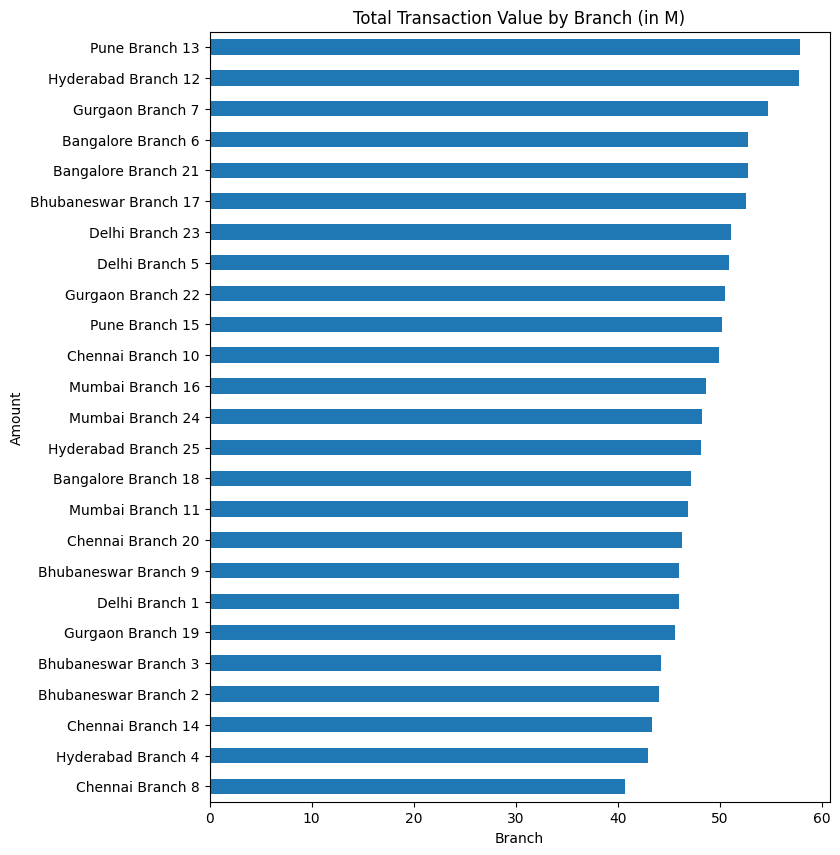

In [17]:
branch_performance.plot(kind="barh", figsize=(8,10))
plt.title("Total Transaction Value by Branch (in M)")
plt.ylabel("Amount")
plt.xlabel("Branch")
plt.show()

**Observations:**
- Transaction performance varies significantly across branches, with top branches generating ₹55–58M, while lower-performing branches remain around ₹40–45M, indicating uneven contribution levels.

- High-performing branches are distributed across multiple cities, suggesting that branch-level execution and customer mix matter more than location alone.

- The performance gap highlights an opportunity to analyze best practices from top branches and apply targeted improvement strategies to lower-performing ones.

**How does transaction value trend over time?**

In [18]:
mon_trend = merged_df.set_index("date").resample("M")["amount"].sum()/100000

mon_trend

date
2023-01-31    1025.61379
2023-02-28     929.31739
2023-03-31    1049.47435
2023-04-30    1011.21732
2023-05-31    1057.52052
2023-06-30    1007.12821
2023-07-31    1026.52779
2023-08-31    1031.41954
2023-09-30     994.64078
2023-10-31    1032.01823
2023-11-30    1008.60559
2023-12-31    1023.05149
Freq: M, Name: amount, dtype: float64

In [19]:
monthly_trend.plot(figsize=(10,4),color='blue')
plt.title("Monthly Transaction Trend (in L)")
plt.ylabel("Transaction Value")
plt.xlabel("Month")
plt.show()

NameError: name 'monthly_trend' is not defined

**Obs:**
- Monthly transaction values remain largely stable throughout the year, fluctuating within a narrow range of approximately ₹930–₹1,060 lakhs, indicating consistent business activity.

- Minor peaks are observed around March, May, and October, suggesting slight seasonal or operational uplifts rather than sharp growth or decline.

- The absence of extreme volatility indicates predictable transaction behavior, which supports reliable forecasting and steady operational planning.

**What is the contribution of different customer types?**

In [ ]:
customer_type_contribution = merged_df.groupby("customer_type")["amount"].sum()

customer_type_contribution

In [ ]:
customer_type_contribution.plot(
    kind="pie",
    autopct="%1.1f%%",
    figsize=(5,5)
)
plt.title("Transaction Contribution by Customer Type")
plt.ylabel("")
plt.show()

The balanced contribution between Retail and SME segments suggests that a dual-focused strategy—volume growth from Retail and value optimization from SME—would be effective.

**Average transaction value by branch**

In [ ]:
avg_transaction_branch = merged_df.groupby("branch_name")["amount"].mean()

avg_transaction_branch.sort_values(inplace=True)

avg_transaction_branch

In [ ]:
sns.barplot(x=avg_transaction_branch,y=avg_transaction_branch.index)

plt.title("Average Transaction Value by Branch")

plt.show()

Since differences in averages are moderate, overall performance variation is more likely driven by transaction volume, making volume growth strategies as important as value optimization.

**What are the overall transaction KPIs?**

In [ ]:
total_transaction_value = merged_df["amount"].sum()
avg_transaction_value = merged_df["amount"].mean()
total_transactions = merged_df.shape[0]

print("Total Transaction Value:",total_transaction_value)
print("Average Transaction Value:",avg_transaction_value) 
print("Total no. of Transactions:",total_transactions)

**Obs:**
- The business has processed a total transaction value of ₹1,219.65 crores, reflecting strong overall transaction activity across the network.

- With an average transaction value of ₹15,246, the transaction mix indicates a balance between high-volume and moderate-value transactions.

- A total of 80,000 transactions highlights significant operational scale, reinforcing the need for efficient processing and performance monitoring.

### Business Recommendations

- Adopt a branch-level performance strategy rather than a city-level approach, as significant variation exists even among branches within the same city.

- Benchmark top-performing branches to identify operational and customer engagement best practices that can be replicated across lower-performing branches.

- Maintain a balanced customer strategy, continuing to leverage Retail customers for volume stability while optimizing SME relationships for higher value contribution.

- Given stable monthly trends, focus on incremental growth and efficiency improvements rather than aggressive seasonal interventions.

- Strengthen performance monitoring through dashboards and KPIs to track branch contribution, customer mix, and transaction trends on an ongoing basis.